## Importing Relevant Modules

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import torch.nn as xnn
import torch.utils.data as td
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Defining Synthetic Data

In [ ]:
def create_data():
  my_feature = torch.tensor(np.array([i*0.85 for i in range(200)],dtype=np.float32))
  my_label   = torch.tensor(np.array([i**1.5+i*0.2 for i in range(200)],dtype=np.float32))

## Setting Device
#### GPU, or local device

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


### Building Neural Network Model
#### Network Architecture

In [ ]:
class neuralNet(nn.Module):
    def __init__(self, n_feature, n_label):
        super(neuralNet, self).__init__()
        self.fc1 = nn.Linear(in_features=n_feature, out_features=n_label)
        self.fc2 = nn.Linear(in_features=n_feature, out_features=n_label)
        self.fc3 = nn.Linear(in_features=n_feature, out_features=n_label)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Defining Functions that Train the Model

In [ ]:
def create_model(inputDim, outputDim):
    model = neuralNet(inputDim, outputDim)
    model.to(device)
    return model
  
def train(model, Xtrain, ytrain, optimizer):
    # Set the model to training mode
    model.train()
    train_loss,batch=0, 0
    
    for i in range(len(Xtrain)):
        data, target = Xtrain[i], ytrain[i]
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()
        batch+=1

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    #print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, Xtest, ytest):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for i in range(len(Xtest)):
            batch_count += 1
            data, target = Xtest[i], ytest[i]
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            predicted = out
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    #print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #    avg_loss, correct, len(data_loader.dataset),
    #    100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

## Generating Train Test Splits

In [ ]:
def load_data():
  create_data()
  Xtrain, Xtest, ytrain, ytest = train_test_split(my_feature, my_label, random_state=18)
  Xtrain = Xtrain.reshape(-1,1)
  Xtest = Xtest.reshape(-1,1)
  ytrain = ytrain.reshape(-1,1)
  ytest = ytest.reshape(-1,1)

## Specify the hyperparameters


The hyperparameters in this Colab are as follows:
*   learning rate
*   epochs
*   batch size



The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

In [ ]:
learning_rate = 0.001
epochs = 100
#batch_size=5

## Training the Model

In [ ]:
load_data()
model = create_model(1, 1)

# Using MSELoss for multi-class classification
loss_criteria = nn.MSELoss()

# Using "Adam" optimizer to adjust weights
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# to track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 100 epochs
for epoch in range(1, epochs + 1):

    # print the epoch number
    #print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, Xtrain, ytrain, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, Xtest, ytest)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

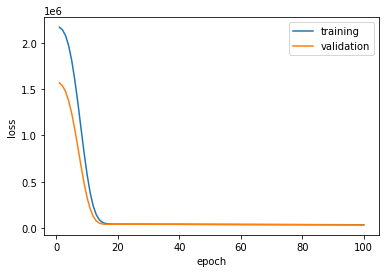

In [ ]:
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

(array([89.,  2.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  3.]),
 array([  33628.54560845,  187159.95536483,  340691.3651212 ,
         494222.77487757,  647754.18463395,  801285.59439032,
         954817.0041467 , 1108348.41390307, 1261879.82365944,
        1415411.23341582, 1568942.64317219]),
 <a list of 10 Patch objects>)

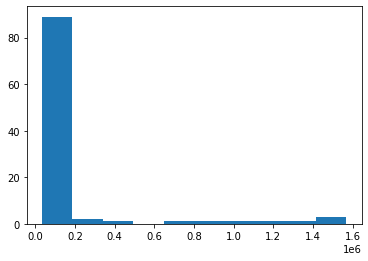

In [ ]:
plt.hist(validation_loss)

## Increasing the number of epochs

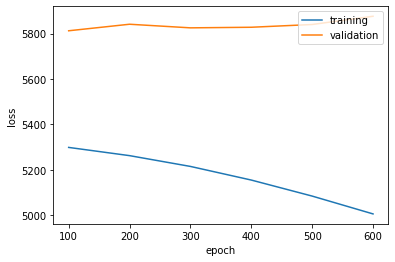

In [ ]:
epochs = [100, 200, 300, 400, 500, 600]
learning_rate = 0.001
training_loss, validation_loss = [], []
avg_training_loss, avg_validation_loss = [],[]
for n in epochs:
  load_data()
  for epoch in range(1, n + 1):

    # print the epoch number
    #print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, Xtrain, ytrain, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, Xtest, ytest)
    
    # Log the metrics for this epoch
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
  avg_training_loss.append(np.mean(np.array(training_loss)))
  avg_validation_loss.append(np.mean(np.array(validation_loss)))

plt.plot(epochs, avg_training_loss)
plt.plot(epochs, avg_validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Increasing the learning rate

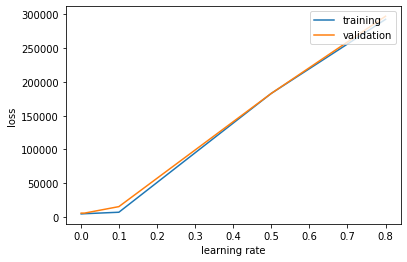

In [ ]:
epochs = 100
learning_rate = [0.001, 0.01, 0.1, 0.5, 0.8]
training_loss, validation_loss = [], []
avg_training_loss, avg_validation_loss = [],[]

for n in learning_rate:
  load_data()
  optimizer = torch.optim.Adam(model.parameters(), lr=n)
  optimizer.zero_grad()
  for epoch in range(1, epochs + 1):

    # print the epoch number
    #print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, Xtrain, ytrain, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, Xtest, ytest)
    
    # Log the metrics for this epoch
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
  avg_training_loss.append(np.mean(np.array(training_loss)))
  avg_validation_loss.append(np.mean(np.array(validation_loss)))

plt.plot(learning_rate, avg_training_loss)
plt.plot(learning_rate, avg_validation_loss)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Summary of hyperparameter tuning (Pointers From Google)

Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:


*   Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
*   If the training loss does not converge, train for more epochs.
*   If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
*   If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
*   Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
*   Setting the batch size to a very small batch number can also cause instability. 
*   First, try large batch size values. Then, decrease the batch size until you see degradation.
*   For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

**Remember**: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.

